In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import load_model
import numpy as np
from emnist import extract_training_samples
from emnist import extract_test_samples
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Using TensorFlow backend.


In [2]:
x_train, y_train = extract_training_samples('byclass')
x_test, y_test = extract_test_samples('byclass')

T


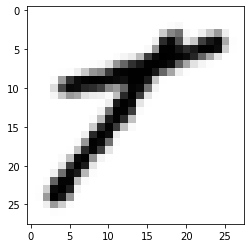

In [3]:
classes = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'
image_index = 12
print(classes[y_train[image_index]])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

In [4]:
print(x_train.shape)
print(x_test.shape)

(697932, 28, 28)
(116323, 28, 28)


In [5]:
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [6]:

num_classes = 62
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [7]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))    
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

In [9]:
model.fit(x_train, y_train, 
          verbose=2, 
          epochs=10, 
          batch_size=256,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save("HCRmodel.h5")

Train on 697932 samples, validate on 116323 samples
Epoch 1/10
 - 38s - loss: 0.5713 - accuracy: 0.8136 - val_loss: 0.4131 - val_accuracy: 0.8522
Epoch 2/10
 - 36s - loss: 0.3966 - accuracy: 0.8561 - val_loss: 0.3874 - val_accuracy: 0.8598
Epoch 3/10
 - 36s - loss: 0.3717 - accuracy: 0.8630 - val_loss: 0.3705 - val_accuracy: 0.8637
Epoch 4/10
 - 36s - loss: 0.3564 - accuracy: 0.8672 - val_loss: 0.3582 - val_accuracy: 0.8667
Epoch 5/10
 - 36s - loss: 0.3453 - accuracy: 0.8705 - val_loss: 0.3570 - val_accuracy: 0.8673
Epoch 6/10
 - 37s - loss: 0.3363 - accuracy: 0.8731 - val_loss: 0.3520 - val_accuracy: 0.8688
Epoch 7/10
 - 37s - loss: 0.3295 - accuracy: 0.8751 - val_loss: 0.3521 - val_accuracy: 0.8690
Epoch 8/10
 - 36s - loss: 0.3234 - accuracy: 0.8766 - val_loss: 0.3498 - val_accuracy: 0.8707
Epoch 9/10
 - 36s - loss: 0.3184 - accuracy: 0.8783 - val_loss: 0.3531 - val_accuracy: 0.8679
Epoch 10/10
 - 36s - loss: 0.3139 - accuracy: 0.8797 - val_loss: 0.3524 - val_accuracy: 0.8699
Test lo

In [10]:
emnist_model = load_model("HCRmodel.h5")
loss_and_metrics = emnist_model.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.3523972835335235
Test Accuracy 0.8698623776435852


In [11]:
predictions = emnist_model.predict(x_test)
AllPredictions = np.argmax(predictions, axis=1)
AllTrue = np.argmax(y_test,axis=1)
print(AllPredictions)
print(AllTrue)

[ 1 36  0 ... 28 24  5]
[18 36  0 ... 28  0  5]


In [12]:
#this is the number of predictions false out of 100000
(AllPredictions != AllTrue).sum()

15138

In [13]:
x_newtest, y_newtest = extract_test_samples('byclass')

1


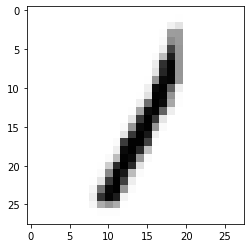

a


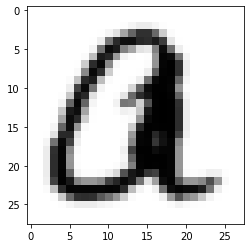

0


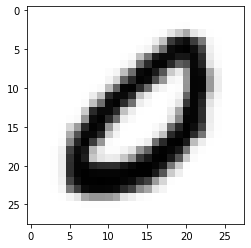

3


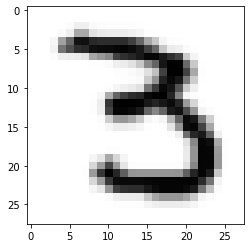

X


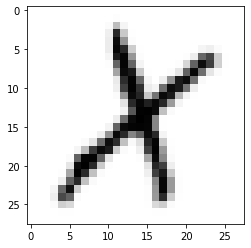

U


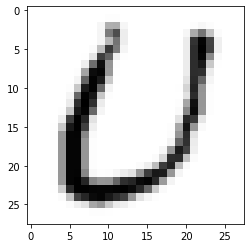

O


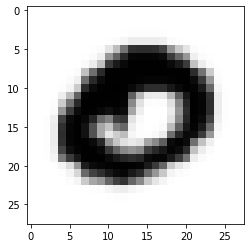

e


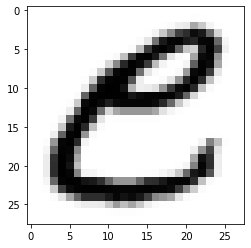

5


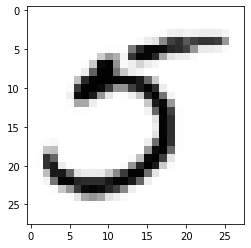

8


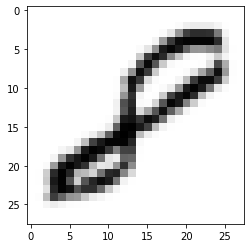

In [14]:
for i in range(10):
    print(classes[AllPredictions[i]])
    plt.imshow(x_newtest[i], cmap='Greys')
    plt.show()